# HW 21
## James Camacho

**Task:** Write code that recreates Table 8.1 of the textbook. It is using the equation

$$u'(t) = \lambda(u-\cos t)-\sin t$$

which has exact solution

$$u(t) = e^{\lambda(t-t_0)}(\eta - \cos(t_0)) + \cos t.$$

We're using $\lambda = -10^6$ and going on the time interval $T\in [0, 3]$.

-----

**Backward Euler Method**

$$U^{n+1} = U^n + k\lambda U^{n+1} - k\lambda\cos(t+k) - k\sin(t+k)$$

$$\Longleftrightarrow$$

$$U^{n+1} =\frac{U^{n} - k(\sin(t+k) + \lambda\cos(t+k))}{1-k\lambda}$$


**Trapezoidal Method**

$$U^{n+1} = U^n + \frac{k}{2}\left[\lambda U^n + \lambda U^{n+1} - \lambda(\cos(t) + \cos(t+k)) - \sin(t) - \sin(t+k)\right]$$

$$\Longleftrightarrow$$

$$U^{n+1} = \frac{(2+k\lambda)U^n - 2k\cos\left(\frac{k}{2}\right)\left[\sin\left(t+\frac{k}{2}\right)+\lambda\cos\left(t+\frac{k}{2}\right)\right]}{2-k\lambda}$$

In [35]:
import math
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

l = -10**6
def f(u, t):
    return l*(u - math.cos(t)) - math.sin(t)

def u_exact(u0, t):
    return math.exp(l*t)*(u0 - 1) + math.cos(t)

def euler(u, k):
    # Backward Euler method.
    t = 0
    while t < 3:
        t += k
        u = (u - k*(math.sin(t) + l*math.cos(t))) / (1-k*l)
    return u, t

def all_euler(u, k):
    # Backward Euler method.
    t = 0
    ts = [t]
    us = [u]
    while t < 3:
        t += k
        u = (u - k*(math.sin(t) + l*math.cos(t))) / (1-k*l)
        ts.append(t)
        us.append(u)
    return us, ts

def trapezoid(u, k):
    # Trapezoidal method.
    t = 0
    kcos = -2*k*math.cos(k/2)
    while t < 3:
        t += k/2
        u = ((2+k*l)*u + kcos*(math.sin(t)+l*math.cos(t)))/(2-k*l)
        t += k/2
    return u, t

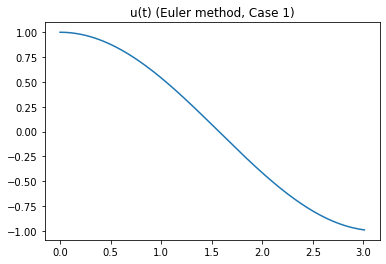

In [36]:
u0 = 1

us, ts = all_euler(u0, 0.01)
plt.plot(ts, us)
plt.title("u(t) (Euler method, Case 1)")
plt.show()

In [37]:
ks = [0.5, 0.2, 0.1]
eulers = []
traps = []
for k in ks:
    u, t = euler(u0, k)
    eulers.append(abs(u - u_exact(u0, t)))
    u, t = trapezoid(u0, k)
    traps.append(abs(u - u_exact(u0, t)))
data = {"Backward Euler": eulers, "Trapezoidal": traps}
df = pd.DataFrame(data, index=ks)
display(df)

,Backward Euler,Trapezoidal
0.5,2.365776e-07,3.015452e-09
0.2,9.773074e-08,4.722897e-10
0.1,4.922330e-08,3.468570e-11


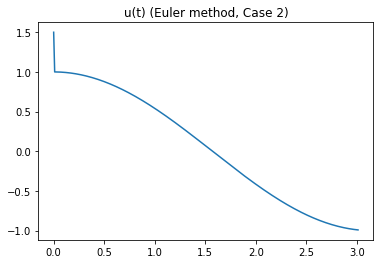

In [38]:
u0 = 1.5

us, ts = all_euler(u0, 0.01)
plt.plot(ts, us)
plt.title("u(t) (Euler method, Case 2)")
plt.show()

In [39]:
eulers = []
traps = []
for k in ks:
    u, t = euler(u0, k)
    eulers.append(abs(u - u_exact(u0, t)))
    u, t = trapezoid(u0, k)
    traps.append(abs(u - u_exact(u0, t)))
data = {"Backward Euler": eulers, "Trapezoidal": traps}
df = pd.DataFrame(data, index=ks)
display(df)

,Backward Euler,Trapezoidal
0.5,2.365776e-07,0.499976
0.2,9.773074e-08,0.499850
0.1,4.922330e-08,0.499380
